# Objective: 
## Evaluate weekly performance across two marketplaces, accounting for product mix differences, and identify efficiency and growth opportunities.

In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration & Validation

In [275]:
df = pd.read_csv("data.csv")

display(df.head())
df.info()

,week_start_date,marketplace,product_type,sku,units_sold,revenue,sessions,ad_spend
0,2023-07-04,MKP B,spare_part,SKU-00081,1,1.00,20,0.00
1,2023-07-11,MKP B,main_range,SKU-00074,1,57.03,29,0.00
2,2023-07-18,MKP B,main_range,SKU-00012,1,50.87,54,8.48
3,2023-07-18,MKP B,main_range,SKU-00015,7,484.99,86,0.00
4,2023-07-25,MKP A,main_range,SKU-00145,1,116.43,36,26.04


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   week_start_date  255 non-null    object 
 1   marketplace      255 non-null    object 
 2   product_type     255 non-null    object 
 3   sku              255 non-null    object 
 4   units_sold       255 non-null    int64  
 5   revenue          255 non-null    float64
 6   sessions         255 non-null    int64  
 7   ad_spend         255 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 16.1+ KB


In [276]:
# check for null value

df.isna().sum()

week_start_date    0
marketplace        0
product_type       0
sku                0
units_sold         0
revenue            0
sessions           0
ad_spend           0
dtype: int64

In [277]:
# check the time range of the data

df["week_start_date"] = pd.to_datetime(df["week_start_date"], errors="coerce")
df["week_start_date"].agg(["min", "max"])

min   2023-07-04
max   2025-06-17
Name: week_start_date, dtype: datetime64[ns]

In [278]:
# check unique value counts in columns : 'marketplace', 'product_type', 'sku'

check_cols = ['marketplace', 'product_type', 'sku']

for check in df[check_cols]:
    print(f"{check} uniques = {len(df[check].unique())}")

marketplace uniques = 2
product_type uniques = 2
sku uniques = 126


In [279]:
# check marketplace names and total data points of each marketplace

df["marketplace"].value_counts()

marketplace
MKP A    131
MKP B    124
Name: count, dtype: int64

In [280]:
# count product types of each marketplace

A = df[df["marketplace"] == "MKP A"]
B = df[df["marketplace"] == "MKP B"]

print(f'MKP A {A["product_type"].value_counts()}')
print("-----------------------------------")
print(f'MKP B {B["product_type"].value_counts()}')

MKP A product_type
main_range    131
Name: count, dtype: int64
-----------------------------------
MKP B product_type
main_range    83
spare_part    41
Name: count, dtype: int64


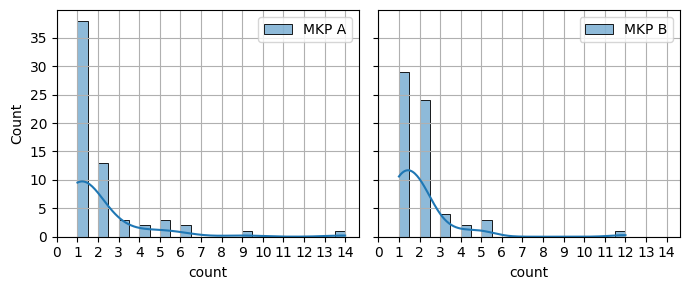

In [281]:
# check sku concentration of each marketplace

fig, ax = plt.subplots(1,2, figsize=(7, 3), sharex=True, sharey=True)
sns.histplot(A["sku"].value_counts(), kde=True, ax=ax[0], label="MKP A")
sns.histplot(B["sku"].value_counts(), kde=True, ax=ax[1], label="MKP B")
ax[0].set_xticks(range(0,15))
ax[1].set_xticks(range(0,15))
ax[0].grid(True)
ax[1].grid(True)
ax[0].legend()
ax[1].legend()
plt.tight_layout()

## KPI

In [282]:
# count conversion_rate and roas

data = df.copy()

data["conversion_rate"] = (data["units_sold"] / data["sessions"]).round(2)
data["roas"] = (data["revenue"] / data["ad_spend"].replace(0, np.nan)).round(2)

data.head()

,week_start_date,marketplace,product_type,sku,units_sold,revenue,sessions,ad_spend,conversion_rate,roas
0,2023-07-04,MKP B,spare_part,SKU-00081,1,1.00,20,0.00,0.05,NaN
1,2023-07-11,MKP B,main_range,SKU-00074,1,57.03,29,0.00,0.03,NaN
2,2023-07-18,MKP B,main_range,SKU-00012,1,50.87,54,8.48,0.02,6.00
3,2023-07-18,MKP B,main_range,SKU-00015,7,484.99,86,0.00,0.08,NaN
4,2023-07-25,MKP A,main_range,SKU-00145,1,116.43,36,26.04,0.03,4.47


### Totals by marketplace

In [297]:
kpi_mkp = data.groupby("marketplace").agg(
    revenue=("revenue", "sum"),
    units_sold=("units_sold", "sum"),
    sessions=("sessions", "sum"),
    ad_spend=("ad_spend", "sum")
)

kpi_mkp["conversion_rate"] = (kpi_mkp["units_sold"] / kpi_mkp["sessions"]).round(2)
kpi_mkp["roas"] = (kpi_mkp["revenue"] / kpi_mkp["ad_spend"]).round(2)

kpi_mkp

,revenue,units_sold,sessions,ad_spend,conversion_rate,roas
marketplace,,,,,,
MKP A,11559.49,265,5539,2219.31,0.05,5.21
MKP B,10127.35,303,4698,905.09,0.06,11.19


### Total main range only

In [ ]:
main = data[data["product_type"] == "main_range"]

kpi_main = main.groupby("marketplace").agg(
    revenue=("revenue", "sum"),
    units_sold=("units_sold", "sum"),
    sessions=("sessions", "sum"),
    ad_spend=("ad_spend", "sum")
)

kpi_main["conversion_rate"] = (kpi_main["units_sold"] / kpi_main["sessions"]).round(2)
kpi_main["roas"] = (kpi_main["revenue"] / kpi_main["ad_spend"]).round(2)

kpi_main

,revenue,units_sold,sessions,ad_spend,conversion_rate,roas
marketplace,,,,,,
MKP A,11559.49,265,5539,2219.31,0.05,5.21
MKP B,8772.46,188,2987,884.73,0.06,9.92


### Totals spare parts only

In [285]:
parts = data[data["product_type"] == "spare_part"]

kpi_parts = parts.groupby("marketplace").agg(
    revenue=("revenue", "sum"),
    units_sold=("units_sold", "sum"),
    sessions=("sessions", "sum"),
    ad_spend=("ad_spend", "sum")
)

kpi_parts["conversion_rate"] = (kpi_parts["units_sold"] / kpi_parts["sessions"]).round(2)
kpi_parts["roas"] = (kpi_parts["revenue"] / kpi_parts["ad_spend"]).round(2)

kpi_parts

,revenue,units_sold,sessions,ad_spend,conversion_rate,roas
marketplace,,,,,,
MKP B,1354.89,115,1711,20.36,0.07,66.55


## Revenue Trends

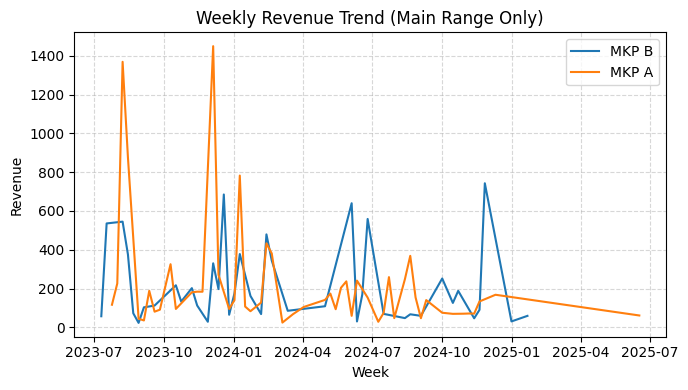

In [335]:
weekly_main_rev = main.groupby(["week_start_date", "marketplace"], as_index=False).agg(revenue=("revenue", "sum"))

plt.figure(figsize=(7, 4))

for mkp in weekly_main_rev["marketplace"].unique():
    weekly_data = weekly_main_rev[weekly_main_rev["marketplace"] == mkp]
    plt.plot(weekly_data["week_start_date"], weekly_data["revenue"], label=mkp)

plt.title("Weekly Revenue Trend (Main Range Only)")
plt.xlabel("Week")
plt.ylabel("Revenue")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

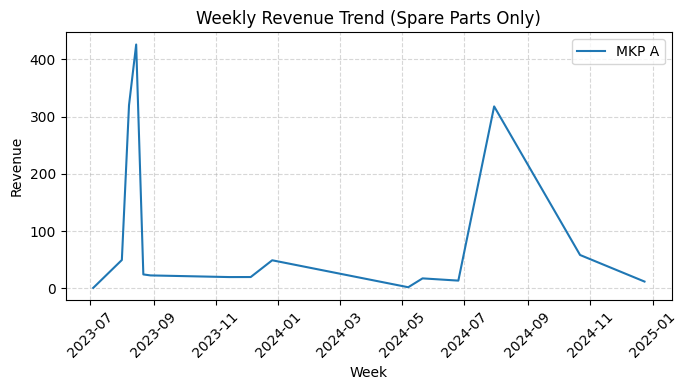

In [337]:
weekly_parts_rev = parts.groupby(["week_start_date", "marketplace"], as_index=False).agg(revenue=("revenue", "sum"))

plt.figure(figsize=(7, 4))
plt.plot(weekly_parts_rev["week_start_date"], weekly_parts_rev["revenue"], label=mkp)
plt.title("Weekly Revenue Trend (Spare Parts Only)")
plt.xlabel("Week")
plt.xticks(rotation=45)
plt.ylabel("Revenue")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

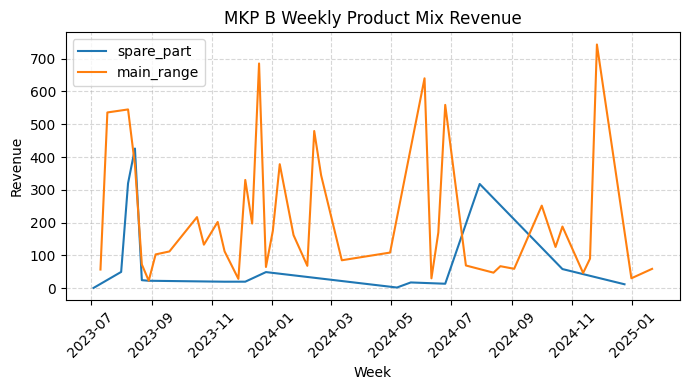

In [ ]:
data_b = data[data["marketplace"] == "MKP B"]

weekly_products_rev = data_b.groupby(["week_start_date", "product_type"], as_index=False).agg(
    revenue=("revenue", "sum"))

plt.figure(figsize=(7, 4))
sns.lineplot(data=weekly_products_rev, x="week_start_date", y="revenue", hue="product_type",
             estimator="sum",   # important: sum per week
             errorbar=None)

plt.title("MKP B Weekly Product Mix Revenue")
plt.xlabel("Week")
plt.xticks(rotation=45)
plt.ylabel("Revenue")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

## Efficiency Comparison

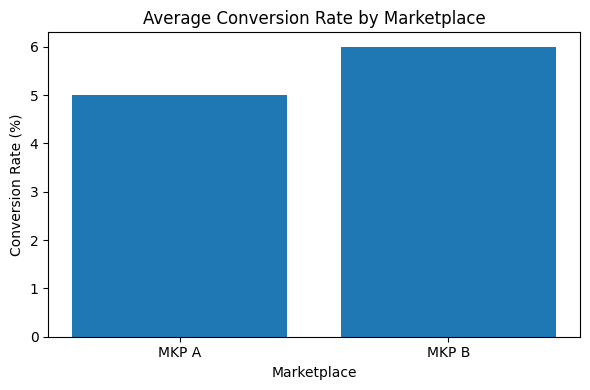

In [341]:
eff_base = kpi_mkp.copy().reset_index()

plt.figure(figsize=(6, 4))
plt.bar(eff_base["marketplace"], eff_base["conversion_rate"] * 100)
plt.title("Average Conversion Rate by Marketplace")
plt.ylabel("Conversion Rate (%)")
plt.xlabel("Marketplace")
plt.tight_layout()
plt.show()

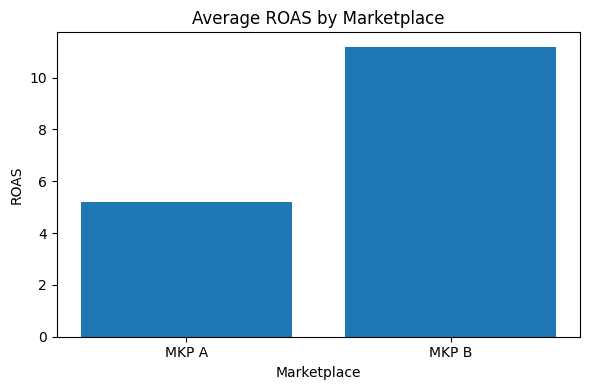

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(eff_base["marketplace"], eff_base["roas"])
plt.title("Average ROAS by Marketplace")
plt.ylabel("ROAS")
plt.xlabel("Marketplace")
plt.tight_layout()
plt.show()

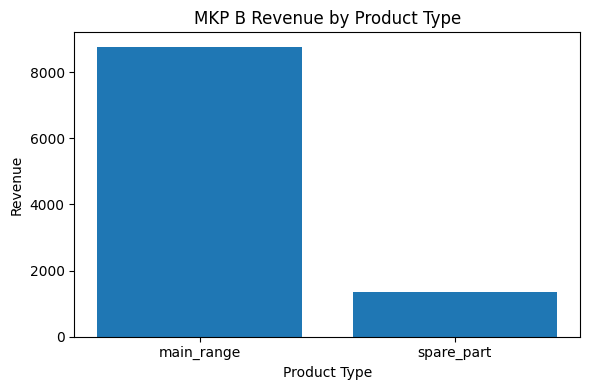

In [343]:
mkp_b_rev = data_b.groupby("product_type", as_index=False).agg(revenue=("revenue", "sum"))

plt.figure(figsize=(6, 4))
plt.bar(mkp_b_rev["product_type"], mkp_b_rev["revenue"])
plt.title("MKP B Revenue by Product Type")
plt.xlabel("Product Type")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

## Top SKU

### Top 10 SKU (all marketplace)

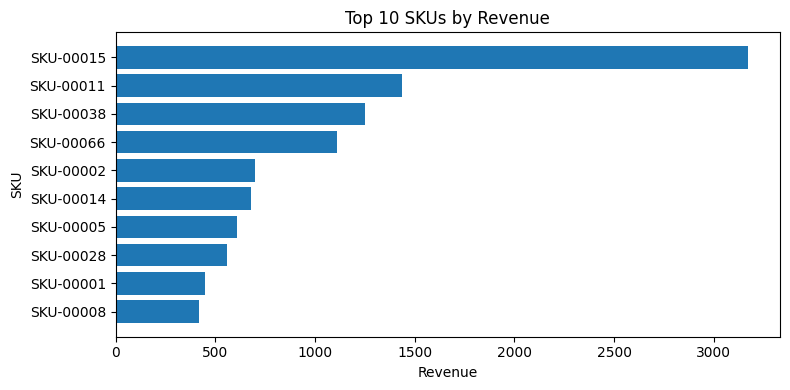

In [ ]:
top_sku = data.groupby("sku", as_index=False).agg(revenue=("revenue", "sum"))
top_10_sku = top_sku.sort_values(by="revenue", ascending=False).head(10)

plt.figure(figsize=(8, 4))
plt.barh(top_10_sku["sku"], top_10_sku["revenue"])
plt.title("Top 10 SKUs by Revenue")
plt.xlabel("Revenue")
plt.ylabel("SKU")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Key Insights
- MKP A and MKP B show distinct performance patterns driven by differences in traffic efficiency and product mix.
- For main range products, MKP A exhibits higher weekly revenue volatility, while MKP B demonstrates steadier demand.
- MKP B achieves a higher average conversion rate, indicating stronger purchase intent despite lower traffic volume.
- ROAS on MKP A varies more widely, suggesting opportunities to improve ad efficiency and budget allocation.
- On MKP B, spare parts provide a stable baseline revenue that helps smooth overall performance.
- Revenue is concentrated among a small number of top SKUs, highlighting the importance of focused optimisation on high-impact products.

### Recommendations
- Concentrate MKP A ad spend on peak demand periods and top-performing SKUs.
- Leverage MKP B’s higher conversion efficiency through organic growth and retention strategies.
- Expand or prioritise spare part offerings where feasible to stabilise revenue.
- Closely monitor top SKUs, as they have an outsized impact on overall results.